In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('./dataset/Predict Hair Fall.csv')
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [32]:
print(df.isnull().sum())

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64


In [33]:
binary_cols = [
    'Genetics', 
    'Hormonal Changes', 
    'Poor Hair Care Habits ', 
    'Environmental Factors', 
    'Smoking', 
    'Weight Loss '
]

# Define the mapping: 'Yes' to 1, 'No' to 0
mapping = {'Yes': 1, 'No': 0}

for col in binary_cols:
    df[col] = df[col].replace(mapping)

df.head()

C:\Users\Hooman\AppData\Local\Temp\ipykernel_9340\345871822.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [34]:
HIGH_CARDINALITY_COLS = [
    'Medical Conditions', 
    'Medications & Treatments', 
    'Nutritional Deficiencies '
]

# Combine any category that appears in less than 5% of the data into 'RARE'.
RARITY_THRESHOLD = 0.05 
MISSING_VALUE_STR = 'No Data'

def group_rare_categories(df, column, threshold, missing_str):
    """
    Groups categories that are below a certain frequency threshold into a 
    'RARE' group and standardizes missing values.
    """
    # print(f"Processing column: {column}")
    
    df[column] = df[column].replace(missing_str, 'MISSING')
    
    # value_counts = df[column].value_counts(normalize=True)
    # rare_categories = value_counts[value_counts < threshold].index.tolist()
    # print(f"Old unique values for {column}: {df[column].nunique()}")
    # df[column] = df[column].replace(rare_categories, 'RARE')
    # print(f"New unique values for {column}: {df[column].nunique()}")
    # print(df[column].value_counts(normalize=True).round(3))
    # print("-" * 50)
    
    return df

for col in HIGH_CARDINALITY_COLS:
    df = group_rare_categories(df, col, RARITY_THRESHOLD, MISSING_VALUE_STR)

In [35]:
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress'] = df['Stress'].replace(stress_mapping).astype(int)

C:\Users\Hooman\AppData\Local\Temp\ipykernel_9340\3319698627.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress'] = df['Stress'].replace(stress_mapping).astype(int)


In [36]:
df['Age_Group'], age_bins = pd.qcut(
    df['Age'], 
    q=4, 
    labels=False, 
    duplicates='drop',
    retbins=True
)

lowest_age = df['Age'].min()
highest_age = df['Age'].max()
print(f"The minimum age in the dataset is: {lowest_age}")
print(f"The maximum age in the dataset is: {highest_age}")

# Convert the bins array into readable ranges
bin_ranges = []
for i in range(len(age_bins) - 1):
    # Format the range as [Lower Bound, Upper Bound]
    lower = round(age_bins[i], 1)
    upper = round(age_bins[i+1], 1)
    bin_ranges.append(f"Bin {i}: ({lower} to {upper}]")

print("--- AGE GROUP BINS (QUARTILES) ---")
for range_str in bin_ranges:
    print(range_str)
print("-" * 50)

# Replace the original 'Age' column with the new binned feature
# df = df.drop(columns=['Age']) 

The minimum age in the dataset is: 18
The maximum age in the dataset is: 50
--- AGE GROUP BINS (QUARTILES) ---
Bin 0: (18.0 to 26.0]
Bin 1: (26.0 to 34.0]
Bin 2: (34.0 to 42.0]
Bin 3: (42.0 to 50.0]
--------------------------------------------------


In [37]:
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Age_Group
0,133992,1,0,MISSING,MISSING,Magnesium deficiency,1,19,1,1,0,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,2,43,1,1,0,0,0,3
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,1,26,1,1,0,1,0,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,1,46,1,1,0,0,0,3
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,1,30,0,1,1,0,1,1


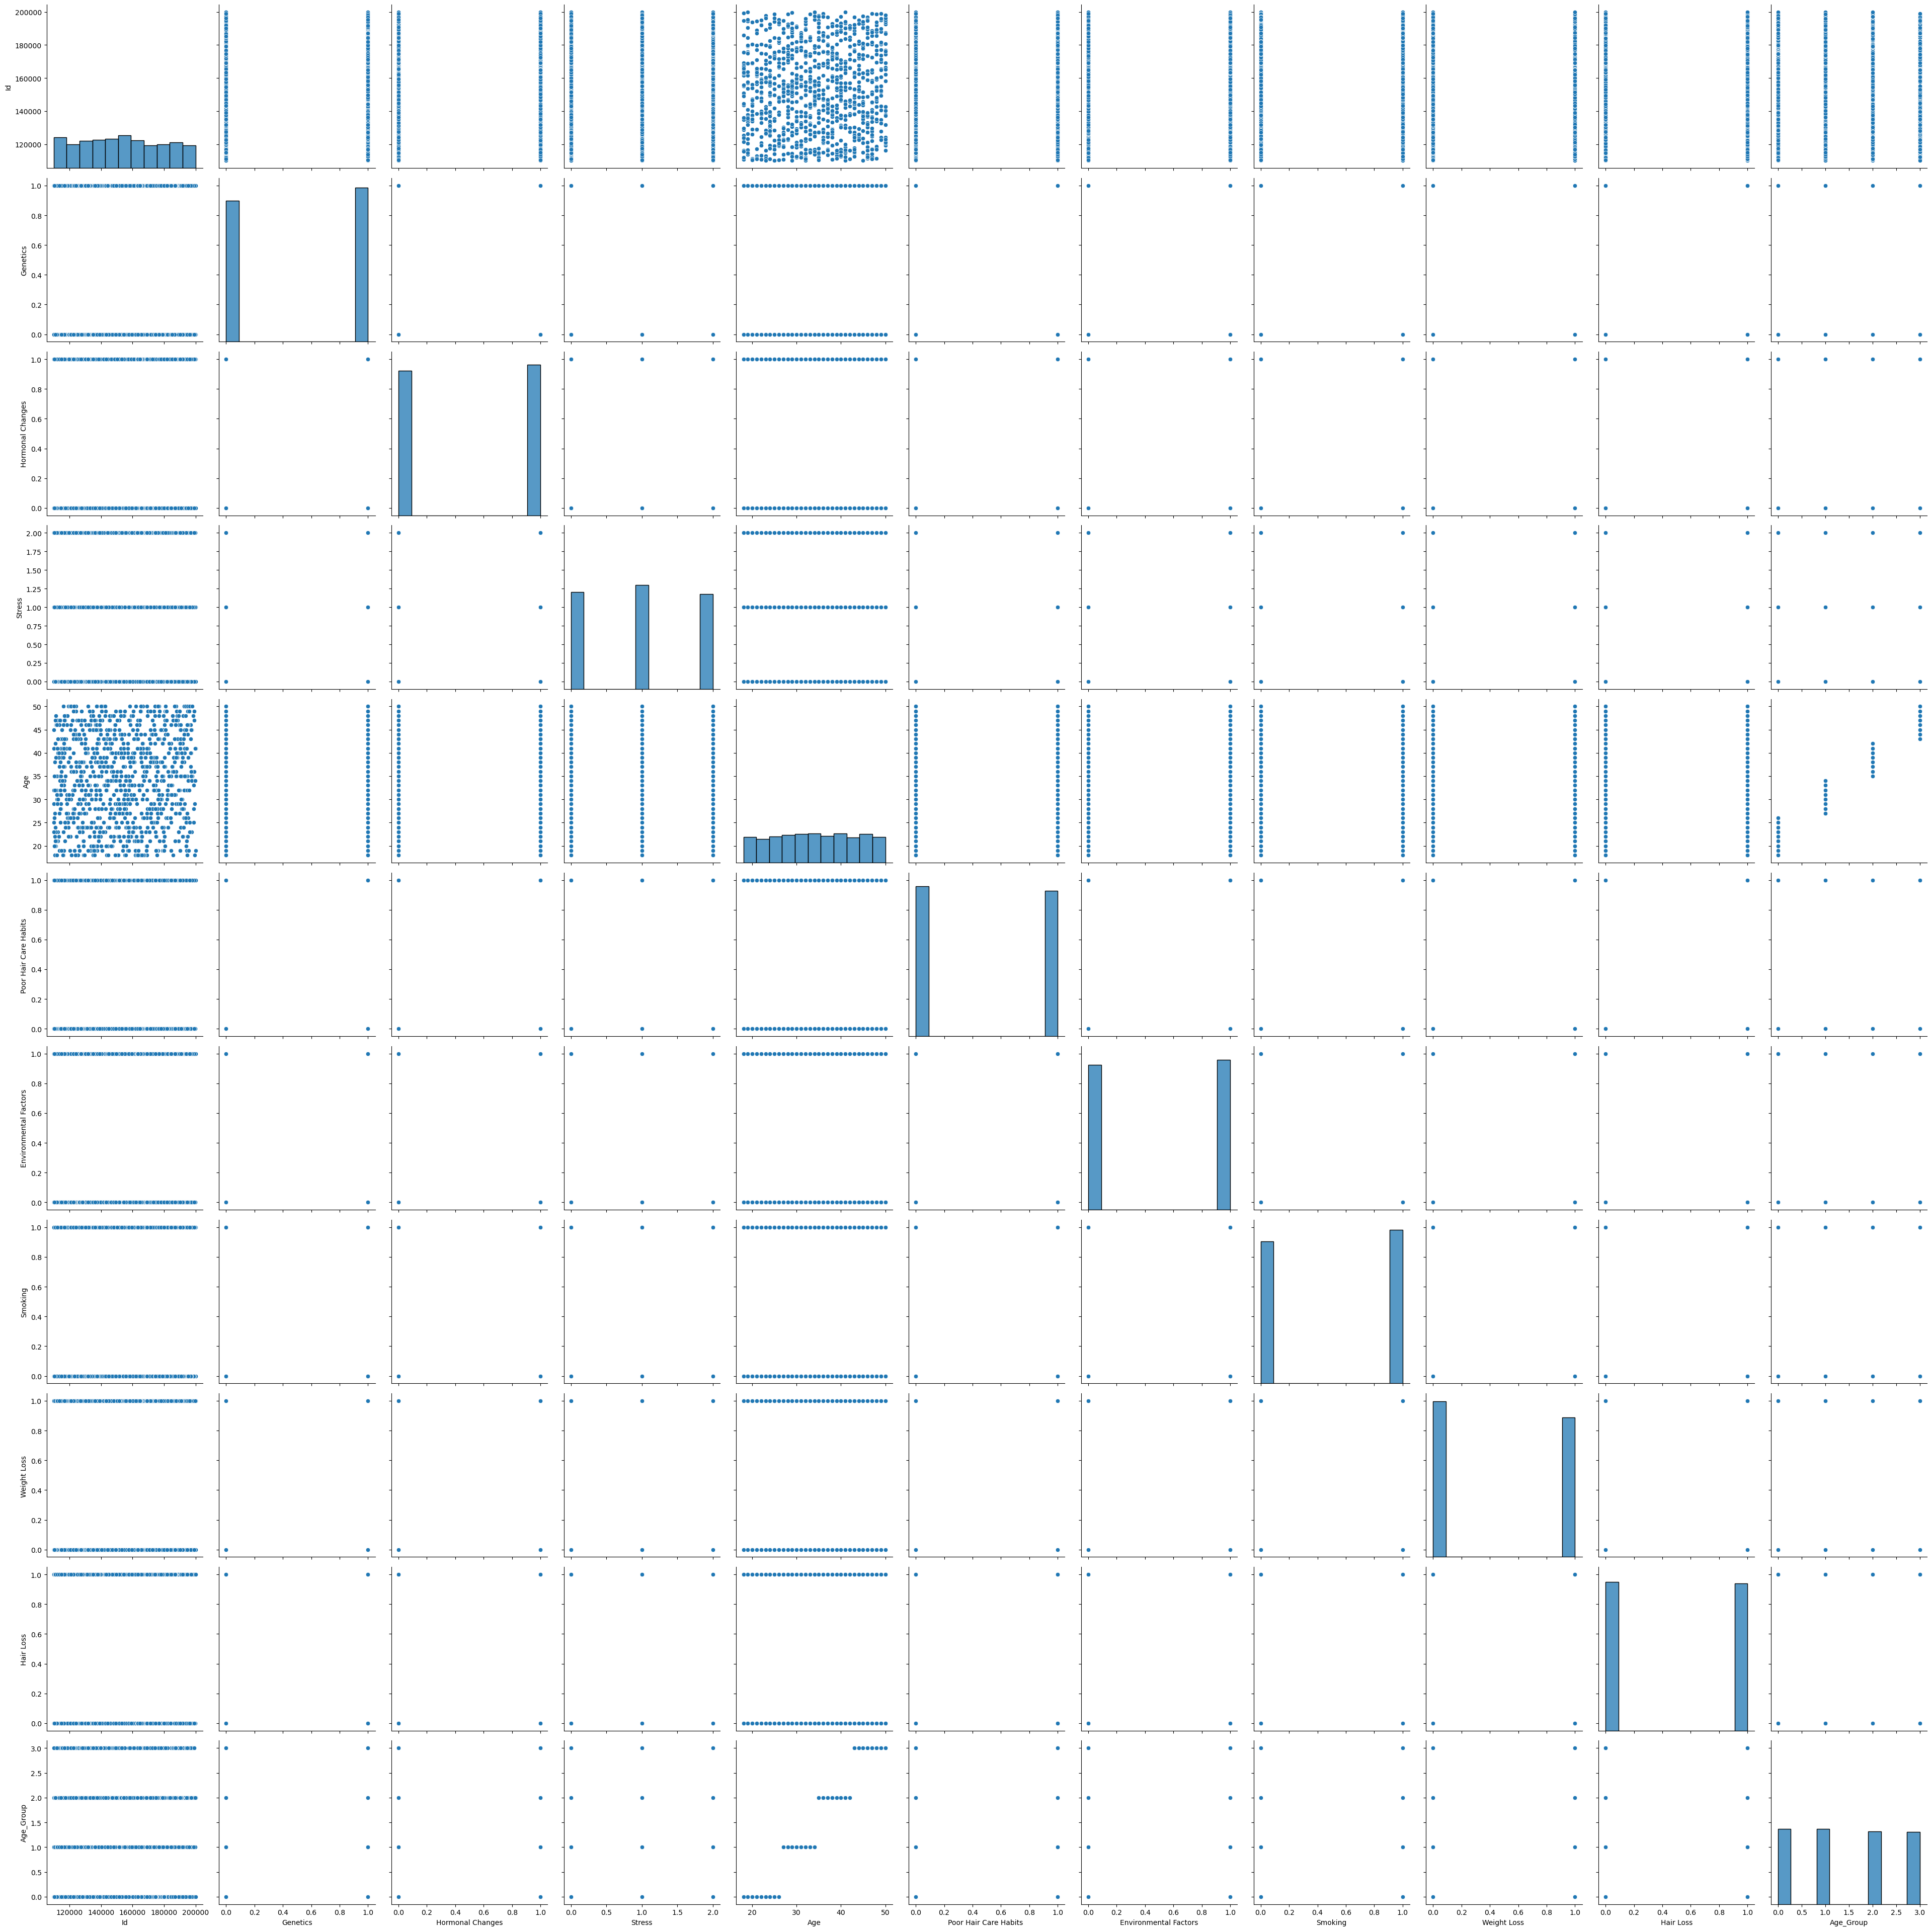

In [38]:
sns.pairplot(df, height=3.5)
plt.tight_layout()
plt.show()


Displaying the heatmap plot... Close the plot window to continue.


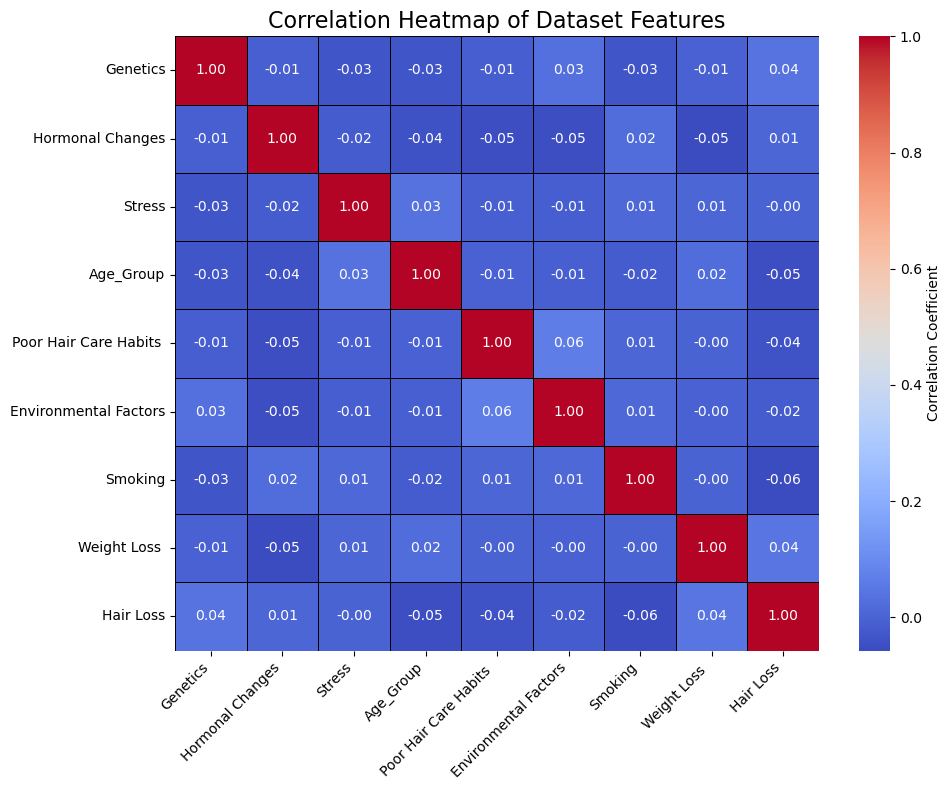

In [39]:
selected_features_for_heatmap = ['Genetics', 'Hormonal Changes', 'Stress', 'Age_Group', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 'Weight Loss ', 'Hair Loss']
correlation_matrix = df[selected_features_for_heatmap].corr()

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
print("\nDisplaying the heatmap plot... Close the plot window to continue.")
plt.show()



In [40]:
# Define features and target
features = ['Genetics', 'Hormonal Changes', 'Stress', 'Age_Group', 'Age',
           'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 
           'Weight Loss ', 'Medical Conditions', 'Medications & Treatments', 
           'Nutritional Deficiencies ']

X = df[features]
y = df['Hair Loss']

# First split: separate test set (10% of data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Second split: divide remaining data into train and validation (89% train, 11% validation of remaining data)
# This will give us approximately 80-10-10 split of the total data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.111, random_state=42
)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Calculate and print the percentages
total_samples = len(df)
print("\nData split percentages:")
print(f"Training: {len(X_train)/total_samples:.1%}")
print(f"Validation: {len(X_val)/total_samples:.1%}")
print(f"Test: {len(X_test)/total_samples:.1%}")

Training set shape: (799, 12)
Validation set shape: (100, 12)
Test set shape: (100, 12)

Data split percentages:
Training: 80.0%
Validation: 10.0%
Test: 10.0%
